In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
cd D:\VIT CLASSES\Sem 4\FDA\Project

D:\VIT CLASSES\Sem 4\FDA\Project


In [3]:
df=pd.read_excel("data.xlsx")
df

,Timestamp,Email address,Name,Gender,Age,Area,What sports/games do u like to play most?,How likely do you play?,At what times do you prefer sports?,What indoor games do you play?,...,Do you follow diet?,"Type your Favourite sport (If nothing, type 'None') -",Which sport events/matches do you watch?,Are you expert in any game/sport?,Do you follow sport news?,"Have you ever played any adventurous sports?(Like bungee jumping, hill climbing, surfing, trekking, etc. )",How often do you do yoga?,How often do you exercise/workout?,Would you like the opportunity to gain additional sports coaching/leadership qualifications?,"Thank you for completing this survey. If you want to share anything else, please write about it here."
0,2023-01-21 18:56:59.564,bhanusri.kowru@gmail.com,Bhanu Sri Kowru,Female,19.0,Rural,Indoor,2.0,Evening,"Chess, Carroms, Snake & Ladders, Musical Chairs",...,No,Badminton,None,Yes,No,No,3.0,1.0,Yes,NaN
1,2023-01-21 19:19:17.623,saikrupaanjalianjali@gmail.com,Sai,Female,18.0,Rural,Indoor,4.0,Morning,"Chess, Table tennis, Deck of Cards, Musical Ch...",...,Yes,No e,"Cricket, Hocky, Kabaddi",No,Yes,Yes,4.0,5.0,Yes,NaN
2,2023-01-21 19:20:35.129,meghana.kandi722004@gmail.com,Meghana.K,Female,18.0,Rural,Both,4.0,Evening,"Chess, Carroms, Ludo, Snake & Ladders",...,Yes,Nothing,"Cricket, Kabaddi, None",No,No,No,4.0,4.0,Yes,Nothing
3,2023-01-21 19:22:41.602,vyshnavi.21bce7430@vitapstudent.ac.in,Vyshnavi,Female,20.0,Urban,Both,2.0,Evening,"Ludo, Snake & Ladders",...,No,Pizza,"Football, Hocky, Kabaddi, Basketball",No,No,No,1.0,4.0,No,NaN
4,2023-01-21 19:23:34.954,vishnu.21bce7466@vitapstudent.ac.in,Allu Deva sai Vishnu vardhan,Male,19.0,Urban,Both,2.0,Evening,"Chess, Carroms, Ludo, Checkers, Snake & Ladders",...,No,Cricket,"Cricket, Football, Kabaddi, Basketball",No,Yes,Yes,2.0,0.0,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2023-01-23 11:34:58.576,sivamani.21bce8232@vitapstudent.ac.in,Sivamani,Male,20.0,Rural,Both,4.0,Evening,Chess,...,No,Cricket,Cricket,Yes,No,No,0.0,0.0,No,No
97,2023-01-23 20:30:14.944,gubbaladurga7@gmail.com,Pallavi,Female,15.0,Rural,Outdoor,5.0,Morning,"Chess, Carroms, Ludo, Snake & Ladders",...,No,Shuttle,None,Yes,No,No,1.0,0.0,Yes,NaN
98,2023-01-24 14:53:34.596,sushanth.21bce8572@vitapstudent.ac.in,Sushanth pedamallu,Male,19.0,Rural,Indoor,2.0,Morning,Chess,...,Yes,Chess,Cricket,Yes,Yes,Yes,3.0,3.0,Yes,No
99,2023-01-24 17:07:42.162,soumajit.21bce7214@vitapstudent.ac.in,Soumajit Pal,Male,19.0,Urban,Outdoor,3.0,Evening,"Chess, Ludo, Snake & Ladders, Table tennis, De...",...,No,Football,"Cricket, Football, Hocky, Kabaddi",Yes,Yes,No,0.0,3.0,No,_


### 1. What is the distribution of gender among survey respondents?

Male      67
Female    34
Name: Gender, dtype: int64


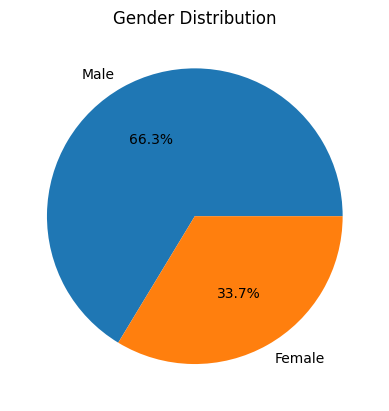

In [4]:
gender_counts = df['Gender'].value_counts()
gender_pct = gender_counts / gender_counts.sum()

print(gender_counts)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

### 2. What is the age distribution of survey respondents?

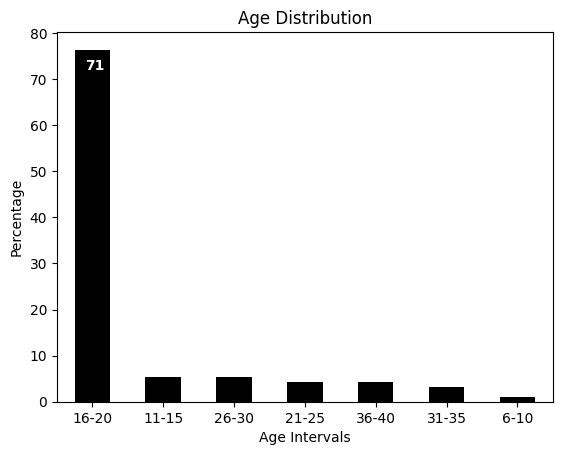

In [5]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_bins = [6, 10, 15, 20, 25, 30, 35, 40]

age_intervals = pd.cut(df['Age'], bins=age_bins, labels=['6-10','11-15','16-20','21-25','26-30','31-35','36-40'])

age_counts = age_intervals.value_counts()
age_pct = age_counts / age_counts.sum() * 100

ax = age_pct.plot.bar(rot=0, color='black')

ax.set_title('Age Distribution')
ax.set_xlabel('Age Intervals')
ax.set_ylabel('Percentage')

for i, v in enumerate(age_counts):
    ax.text(i - 0.1, v + 1, str(v), color='white', fontweight='bold')

plt.show()

### 3. What is the distribution of favorite sports among female survey respondents who follow a diet?

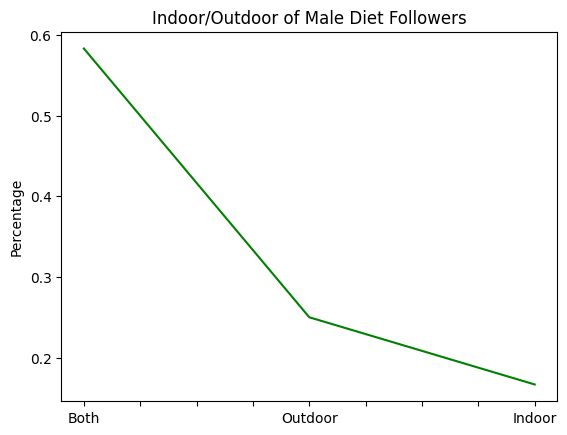

In [6]:
female_diet = df[(df['Gender'] == 'Male') & (df['Do you follow diet?'] == 'Yes')]
sport_counts = female_diet['What sports/games do u like to play most?'].value_counts()
sport_pct = sport_counts / sport_counts.sum()

ax = sport_pct.plot(kind='line',rot=0,color='green')
ax.set_title('Indoor/Outdoor of Male Diet Followers')
ax.set_ylabel('Percentage')

plt.show()

### 4. What is the relationship between Frequency of Exercising/Workouts and Frequency of Doing Yoga among Survey Respondents

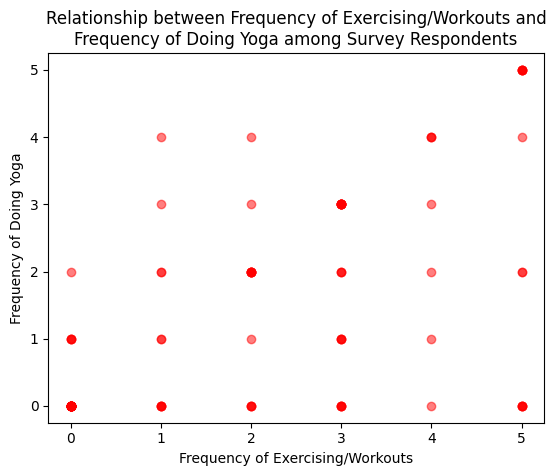

In [7]:
x = df['How often do you exercise/workout?']
y = df['How often do you do yoga?']
plt.scatter(x, y, alpha=0.5, color='red')
plt.xlabel('Frequency of Exercising/Workouts')
plt.ylabel('Frequency of Doing Yoga')
plt.title('Relationship between Frequency of Exercising/Workouts and\nFrequency of Doing Yoga among Survey Respondents')
plt.show()

### 5. What is the distribution of sport event/match watched by survey respondents who are experts in any game/sport?

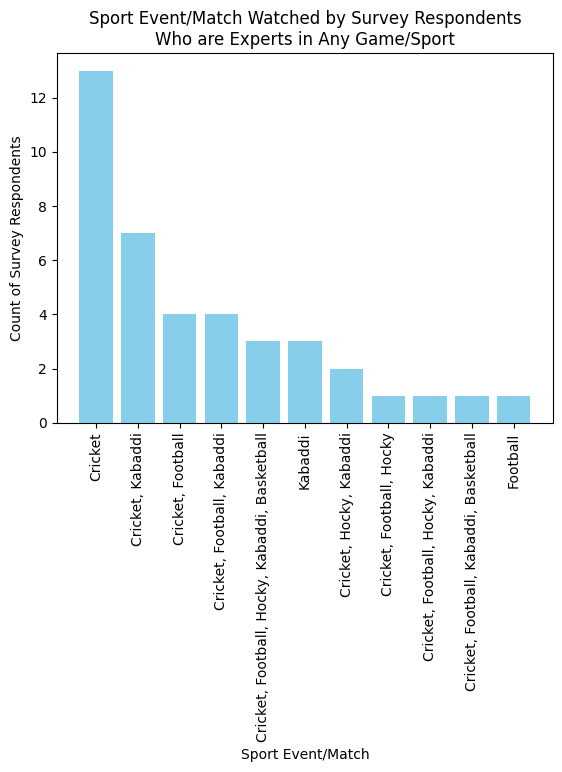



The most popular sport event/match watched by survey respondents who are experts in any game/sport is 'Cricket' with a count of 13.


In [8]:
experts = df[(df['Are you expert in any game/sport?'] == 'Yes') & (df[' Which sport events/matches do you watch?'] != 'None')]

# group the data by sport event/match and count the number of respondents
event_counts = experts.groupby(' Which sport events/matches do you watch?').size().reset_index(name='count')

# sort the data by count in descending order
event_counts = event_counts.sort_values('count', ascending=False)

plt.bar(event_counts[' Which sport events/matches do you watch?'], event_counts['count'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Sport Event/Match')
plt.ylabel('Count of Survey Respondents')
plt.title('Sport Event/Match Watched by Survey Respondents\nWho are Experts in Any Game/Sport')
plt.show()

most_popular_event = event_counts.loc[event_counts['count'].idxmax()]

print(f"\n\nThe most popular sport event/match watched by survey respondents who are experts in any game/sport is '{most_popular_event[' Which sport events/matches do you watch?']}' with a count of {most_popular_event['count']}.")

### 6. What is the age of distribution of survey respondents who follow sport news?

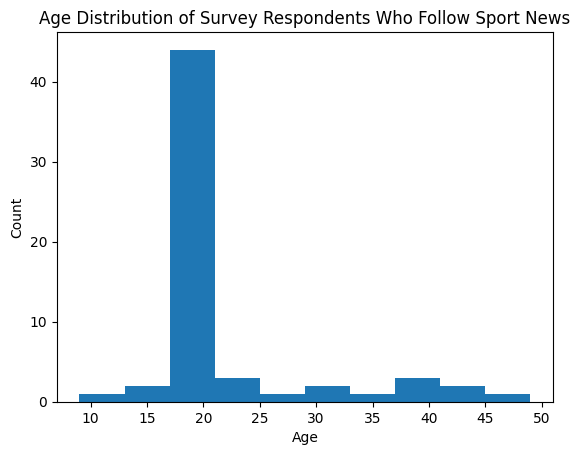

In [9]:
sport_news = df[df['Do you follow sport news?'] == 'Yes']
age = sport_news['Age']

plt.hist(age, bins=10)

plt.title('Age Distribution of Survey Respondents Who Follow Sport News')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

### 7. What is the frequency of practicing diet among survey respondents who prefer outdoor games over indoor games?

C:\Users\nisha\AppData\Local\Temp\ipykernel_16240\4153385486.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outdoor_diet_players = outdoor_players[diet_followers]


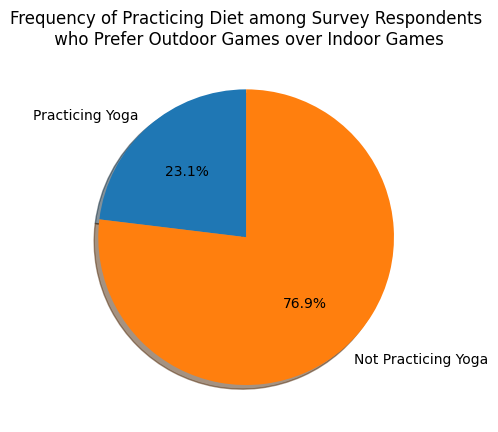

In [10]:
outdoor_preference = df['What sports/games do u like to play most?']=='Outdoor'
outdoor_players = df[outdoor_preference]
diet_followers = df['Do you follow diet?']=='Yes'

outdoor_diet_players = outdoor_players[diet_followers]

diet_freq = (diet_followers & outdoor_preference).sum() / outdoor_players.shape[0]

labels = ['Practicing Yoga', 'Not Practicing Yoga']
sizes = [outdoor_diet_players.shape[0], outdoor_players.shape[0] - outdoor_diet_players.shape[0]]


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Frequency of Practicing Diet among Survey Respondents\n who Prefer Outdoor Games over Indoor Games')
plt.show()

### 8. How many survey respondents who are not experts in any game/sport and would like the opportunity to gain additional sports coaching/leadership qualifications, compared to those who are experts?

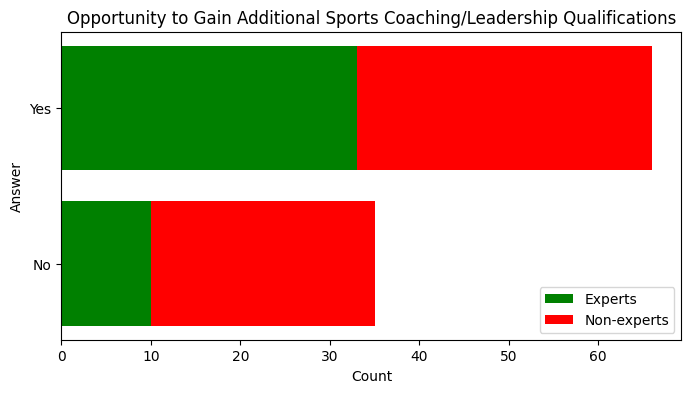

In [11]:
experts = df[df['Are you expert in any game/sport?'] == 'Yes']
non_experts = df[df['Are you expert in any game/sport?'] == 'No']

# group the data by the opportunity to gain additional sports coaching/leadership qualifications
experts_grouped = experts.groupby('Would you like the opportunity to gain additional sports coaching/leadership qualifications?').size().reset_index(name='count')
non_experts_grouped = non_experts.groupby('Would you like the opportunity to gain additional sports coaching/leadership qualifications?').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(experts_grouped['Would you like the opportunity to gain additional sports coaching/leadership qualifications?'], experts_grouped['count'], color='green', label='Experts')
ax.barh(non_experts_grouped['Would you like the opportunity to gain additional sports coaching/leadership qualifications?'], non_experts_grouped['count'], color='red', left=experts_grouped['count'], label='Non-experts')

ax.set_title('Opportunity to Gain Additional Sports Coaching/Leadership Qualifications')
ax.set_xlabel('Count')
ax.set_ylabel('Answer')
ax.legend()

plt.show()

### 9. What is the distribution of preferred times for playing sports/games among survey respondents who follow sports news and follow a diet?

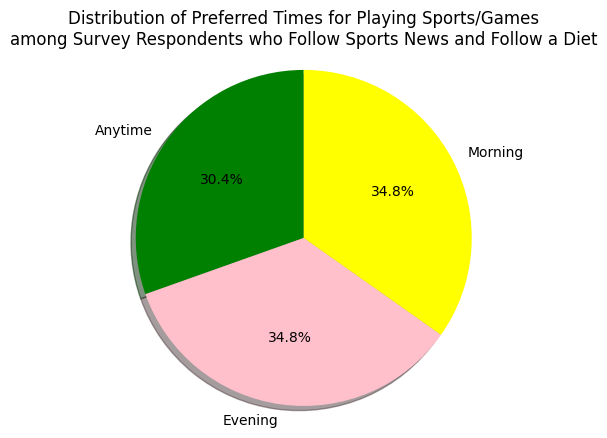

In [12]:
condition = (df['Do you follow sport news?'] == 'Yes') & (df['Do you follow diet?'] == 'Yes')
filtered_df = df[condition]

grouped_df = filtered_df.groupby('At what times do you prefer sports?').size()

# create a pie chart to visualize the distribution of preferred times for playing sports/games
labels = grouped_df.index
sizes = grouped_df.values
colors = ['green', 'pink', 'yellow']
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors,
       autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Distribution of Preferred Times for Playing Sports/Games\namong Survey Respondents who Follow Sports News and Follow a Diet')
plt.show()

### 10. What is the count of each indoor & outdoor sports played by all respondents?

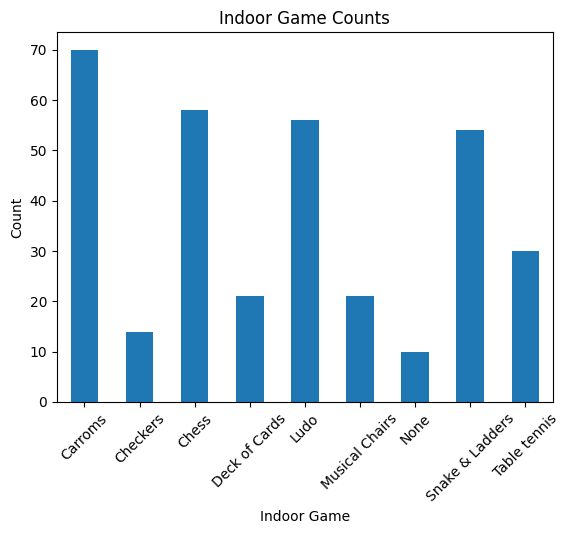

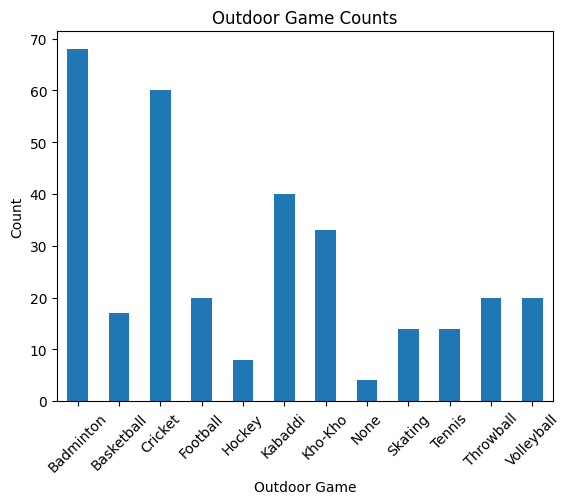

In [13]:
# Count the number of times each indoor game is selected by all respondents
indoor_counts = df['What indoor games do you play?'].str.get_dummies(sep=', ').sum()

# Count the number of times each outdoor game is selected by all respondents
outdoor_counts = df['What outdoor games do you play?'].str.get_dummies(sep=', ').sum()

# Create a bar plot of the indoor game counts
ax = indoor_counts.plot(kind='bar',rot=0)

ax.set_title('Indoor Game Counts')
ax.set_xlabel('Indoor Game')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.show()

# Create a bar plot of the outdoor game counts
ax = outdoor_counts.plot.bar(rot=0)

ax.set_title('Outdoor Game Counts')
ax.set_xlabel('Outdoor Game')
ax.set_ylabel('Count')
ax.tick_params(axis='x', rotation=45)

plt.show()

### 11.What is the comparison of preferred sports among male survey respondents under 25 years old and those over 25 years old, based on whether they like to play indoor, outdoor or both sports/games?

C:\Users\nisha\AppData\Local\Temp\ipykernel_16240\1727636541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Age'] = pd.to_numeric(male_df['Age'], errors='coerce')
C:\Users\nisha\AppData\Local\Temp\ipykernel_16240\1727636541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_df['Age Group'] = np.where(male_df['Age'] < 25, 'Under 25', 'Over 25')


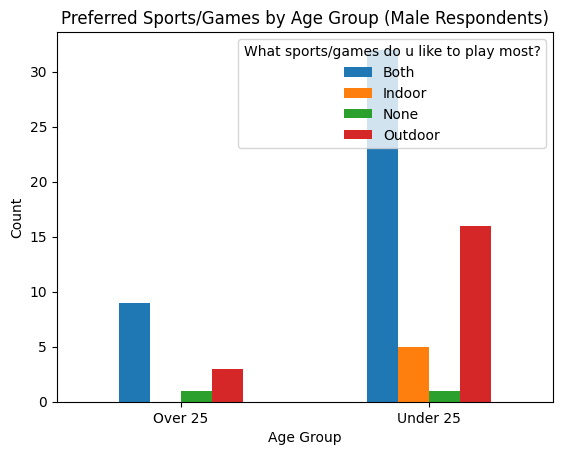

In [14]:
male_df = df[df['Gender'] == 'Male']
male_df['Age'] = pd.to_numeric(male_df['Age'], errors='coerce')
male_df['Age Group'] = np.where(male_df['Age'] < 25, 'Under 25', 'Over 25')
sports_df = male_df[['What sports/games do u like to play most?', 'Age Group']]
sports_counts = sports_df.groupby('Age Group')['What sports/games do u like to play most?'].value_counts()

ax = sports_counts.unstack().plot.bar(rot=0)

ax.set_title('Preferred Sports/Games by Age Group (Male Respondents)')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')

plt.show()

### 12. What is the most commonly watched sport/event among survey respondents who are experts in any game/sport and over 35 years old?

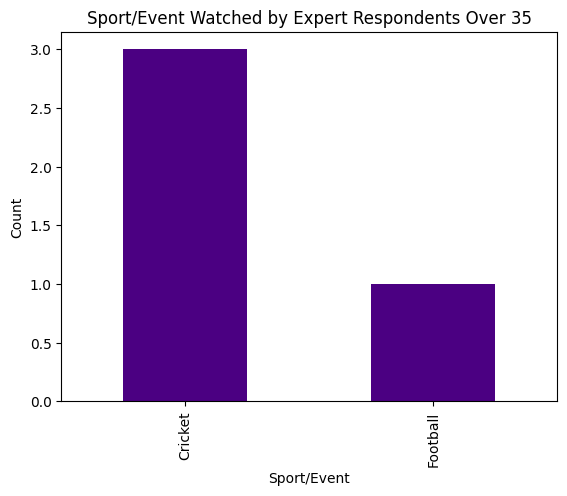

In [15]:
expert_over_35 = df[(df['Are you expert in any game/sport?'] == 'Yes') & (df['Age'] > 35)]
watched_counts = expert_over_35[' Which sport events/matches do you watch?'].value_counts()

ax = watched_counts.plot.bar(color='indigo')

ax.set_title('Sport/Event Watched by Expert Respondents Over 35')
ax.set_xlabel('Sport/Event')
ax.set_ylabel('Count')

plt.show()